In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training data

In [46]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = df_train.iloc[:, 1:2].values

In [47]:
from sklearn.preprocessing import MinMaxScaler  # Normalization
sc = MinMaxScaler(feature_range = (0, 1))  # all scaled price between 0 and 1
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timestamps and 1 output

In [48]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])  # Predict the 60th time stamp by looking at the first 59!
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [49]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the Network

In [50]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM, Input
from keras.layers import Dropout

In [51]:
# Define input layer
inputs = Input(shape=(X_train.shape[1], 1))

# Build the rest of the model
x = LSTM(units=50, return_sequences=True)(inputs)
x = Dropout(0.2)(x)
x = LSTM(units=70, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(units=60, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(units=50, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(units=50)(x)
x = Dropout(0.2)(x)
outputs = Dense(units=1)(x)

# Create the model
regressor = Model(inputs=inputs, outputs=outputs)

In [52]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
regressor.fit(X_train, y_train, epochs=115, batch_size=32)

Epoch 1/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0849
Epoch 2/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0080
Epoch 3/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0062
Epoch 4/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoch 5/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0057
Epoch 6/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0056
Epoch 7/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044
Epoch 8/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0053
Epoch 9/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050
Epoch 10/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044
Epoch 11/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042
Epoch 12/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0051
Epoch 13/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0043
Epoch 14/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043
Epoch 15/115
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - lo

In [54]:
df_test = pd.read_csv("Google_Stock_Price_Test.csv")
test_set = df_test.iloc[:, 1:2].values

## Getting the predicted Stock Price

In [55]:
dataset_total = pd.concat((df_train["Open"], df_test["Open"]), axis=0)

In [56]:
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

## Visualize the results

In [57]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


## Visualizing the final result

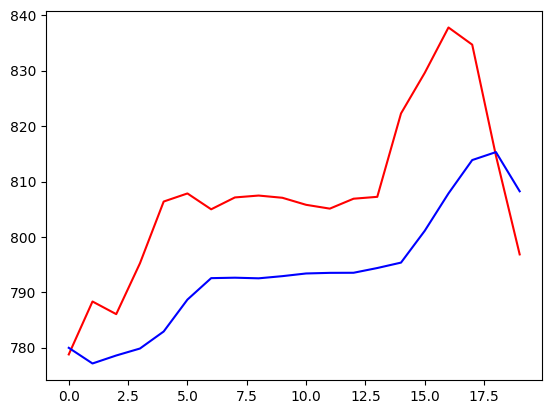

In [59]:
plt.plot(df_test["Open"], color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")

## *Well the output is pretty good the steep curves are a bit difficult to understand for the model however the model still adapts pretty properly on this data.*